# CIC0193 - Fundamentos de Sistemas Inteligentes -- Projeto 2

---


##Prof. Díbio 

#####Aluno: *Vitor Vasconelos de Oliveira*
#####Matrícula: *180114778*


# **Considerações importantes:**



## YoloV4



A yolo treinada neste projeto teve como basse a Yolov4 implementada por AlexyeAB em seu github: https://github.com/AlexeyAB/darknet

Após a Clonagem do repositório foram realizadas diversas mudanças segundo o tutorial: https://medium.com/analytics-vidhya/train-a-custom-yolov4-object-detector-using-google-colab-61a659d4868

Essas mudanças visaram possibilitar que a Darknet de Alexey fosse treinada no Google Colab utilizando o Dataset de "Whiteflys" disponibilizado.

In [ ]:
# Clonagem do github de AlexeyAB
#!git clone https://github.com/AlexeyAB/darknet

De maneira rápida, as mudanças realizadas foram: o estabelecimento do dataset de 3000 imagens de folhas e Whiteflys, alterações nos arquivos referentes as indicações de classes, quantidades de classes e diretórios para treinamneto, validação, teste e salvamento de pesos.

Por fim foram feitas alterações nas configurações das camadas da YoloV4 para garantir seu funcionamento ideal:

Foram alterações nos números de Batchs e subdivisões, tamanho das imagens, filtros nas últimas camadas convolucionais antes de camadas YOLO e número de classes da rede.


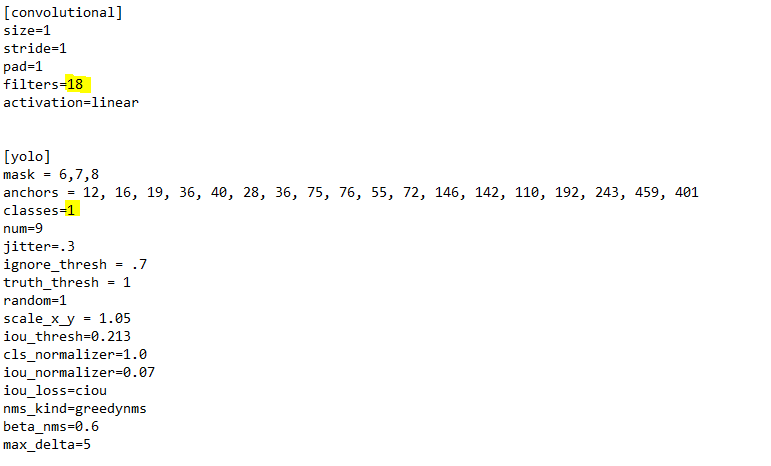
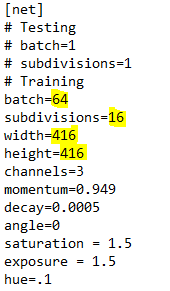

Com relação aos pesos, os pesos iniciais também foram baixados da Darknet de AlexeyAB:

In [ ]:
# Código pra fazer download dos pesos
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

## Dataset

Com relação ao Dataset, ele foi dividido utilizando um script auxiliar disponibilizado pelo tutorial citado acima com modificações para incluir separação de dados de validação.

As 1000 imagens de cada classificação (Low, Moderate, Super) foram unidas para a aplicação do script, que então as dividiu de maneira igualmente balanceada em 2600 dados de treinamento, 200 dados para validação e 200 dados para teste.


Ainda sobre o Dataset, foi necessário seu tratamento utilizando um script que transfroma anotações em .XML para anotações em .txt no formato de entrada para yolov4.

O script para tal conversão foi inspirado em: https://towardsdatascience.com/convert-pascal-voc-xml-to-yolo-for-object-detection-f969811ccba5

Foram nescessarias alterações entretanto para levar em conta anotações com erros, por exemplo, o nome escrito "whitfly" ao invés de "whitefly".


**Ambos os Scripts estão disponíves no notebook auxiliar enviado junto ao trabalho**

# **Estabelecendo o ambiente para YoloV4**

## **Montando Drive e ajustando pastas:**

In [1]:
#Monta drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# link para caminho padrão /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/yolov4

/
Mounted at /content/gdrive
'Colab Notebooks'   images   imgs  'My Drive'   XML2TXT.ipynb   yolov4
/content/gdrive/My Drive/yolov4


## **Alterações no Makefile da Darknet para utilizar OPENCV e GPU**

In [2]:
# Alterando Makefile
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4/darknet


## **Utilizando makefile para construir de fato a Darknet**

In [3]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# **Treinamento**

## **Treinamento inicial** 

Essa é a célula para iniciar os treinamentos a partir do pesos baixados da Yolov4 da Darknet:

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

## **Recomeçar Treinamento** 


Devido aos limites do colab é comum que seu treinamento seja interrompido quando desconectado.

Se seu treinamento foi longe o suficiente para estabelecer "best weights", você pode escolher começar por eles a invés dos "last weights" 

Para continuar o treinamento de onde parou basta rodar a célula a seguir:

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights -dont_show -map
#!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -dont_show -map

A saída de streaming foi truncada nas últimas 5000 linhas.
 total_bbox = 3022504, rewritten_bbox = 21.664124 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.450290), count: 461, class_loss = 32.734894, iou_loss = 2673.989014, total_loss = 2706.723877 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.000015, iou_loss = 0.000000, total_loss = 0.000015 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 3022965, rewritten_bbox = 21.664360 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.349860), count: 216, class_loss = 8.905960, iou_loss = 1188.512573, total_loss = 1197.418579 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.0000


# Uma função para evitar que o colab se disconecte por inatividade:

Basta apretar Cntrl+shift+i e cola-la no console:


```
var startClickConnect = function startClickConnect(){
    var clickConnect = function clickConnect(){
        console.log("Connnect Clicked - Start");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
        console.log("Connnect Clicked - End"); 
    };

    var intervalId = setInterval(clickConnect, 60000);

    var stopClickConnectHandler = function stopClickConnect() {
        console.log("Connnect Clicked Stopped - Start");
        clearInterval(intervalId);
        console.log("Connnect Clicked Stopped - End");
    };

    return stopClickConnectHandler;
};

var stopClickConnect = startClickConnect();
```



#Para parar a função:

```
stopClickConnect();
```

# **Testando**

## **MAPA de teste**

A função MAP permite ao modelo YoloV4 realizar predições em várias imagens e mostrar seus resultados na forma de precision, recall, F1-score, TP, FP, FN entre ourtos parâmetros.

Além disso é demonstrado o esqueleto da Yolo.

Vamos aplicar a função Map primeiramente nos dados de validação e posteriormente nos dados de teste:

In [5]:
# MAP Nos dados de validação:
!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yolov4/training/yolov4-custom_best.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

Aqui é necessaria a troca dos dados e validação pelos de teste para função Map:

In [6]:
# troca dos dados de validação por dados de teste
%cd data
!sed -i '3s/valid.txt/test.txt/1' obj.data
%cd ..

/content/gdrive/MyDrive/yolov4/darknet/data
/content/gdrive/MyDrive/yolov4/darknet


In [7]:
# MAP Nos dados de teste:
!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yolov4/training/yolov4-custom_best.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

Aqui desfazemos essa troca, restonanodo os dados de validação:

In [8]:
# troca dos dados de teste por dados de validação
%cd data
!sed -i '3s/test.txt/valid.txt/1' obj.data
%cd ..


/content/gdrive/MyDrive/yolov4/darknet/data
/content/gdrive/MyDrive/yolov4/darknet


##Função auxiliar para mostar imagens da yolo:



In [4]:
# definição de função de imagens
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


## **Testando em imagens do dataset de teste**

Para testar as predições do modelo nas imagens de teste é recomendável trocar os seguinte valores no .cfg da yolo:
*   Trocar batch=1
*   Trocar subdivisions=1
Isso pode ser feito a mão ou com o código da célula a seguir

In [34]:
%cd cfg
!sed -i '3s/# batch=1/batch=1/1' yolov4-custom.cfg
!sed -i '4s/# subdivisions=1/subdivisions=1/1' yolov4-custom.cfg
!sed -i '6s/batch=64/# batch=64/1' yolov4-custom.cfg
!sed -i '7s/subdivisions=16/# subdivisions=16/1' yolov4-custom.cfg
%cd ..

/content/gdrive/MyDrive/yolov4/darknet/cfg
/content/gdrive/MyDrive/yolov4/darknet


**A seguir são feitas as predições em si, onde podemos ver novamente um esqueleto da Yolo além do número de "whiteflys" detectadas na imagem, sua classificação entre LOW, MODERATE e SUPER abundance, tempo de predição e por fim a imagem com as predições e confiança dessas predições.**

Foram testados 3 exemplos das 200 imagens do conjunto de teste, um representando cada nível de abundancia.

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

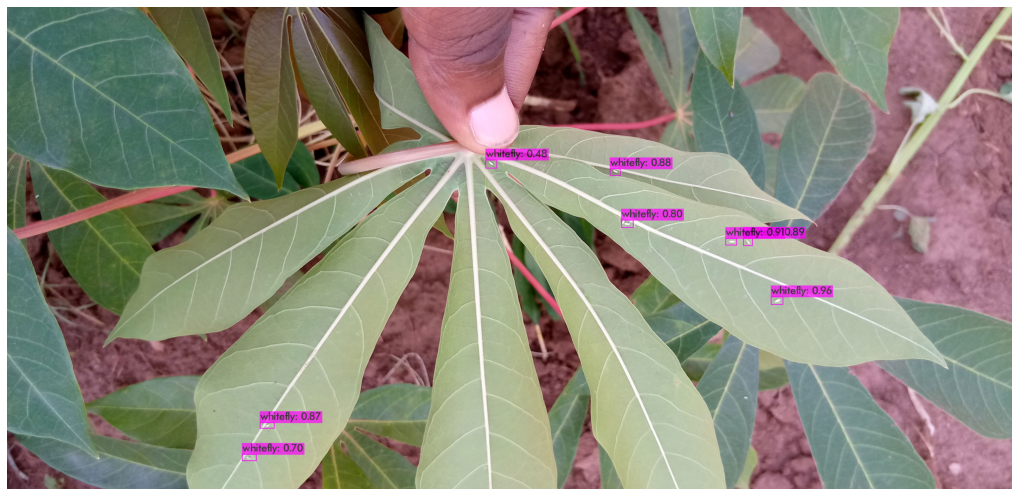

In [35]:
# Low abundance
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yolov4/training/yolov4-custom_best.weights /mydrive/imgs/IMG_20190220_004626_9.jpg -thresh 0.3 -dont_show
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

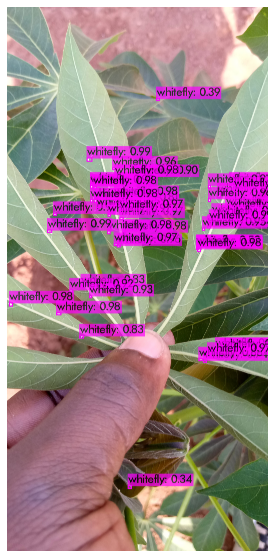

In [36]:
# Moderate abundance
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yolov4/training/yolov4-custom_best.weights /mydrive/imgs/IMG_20190306_040930_8.jpg -thresh 0.3 -dont_show
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

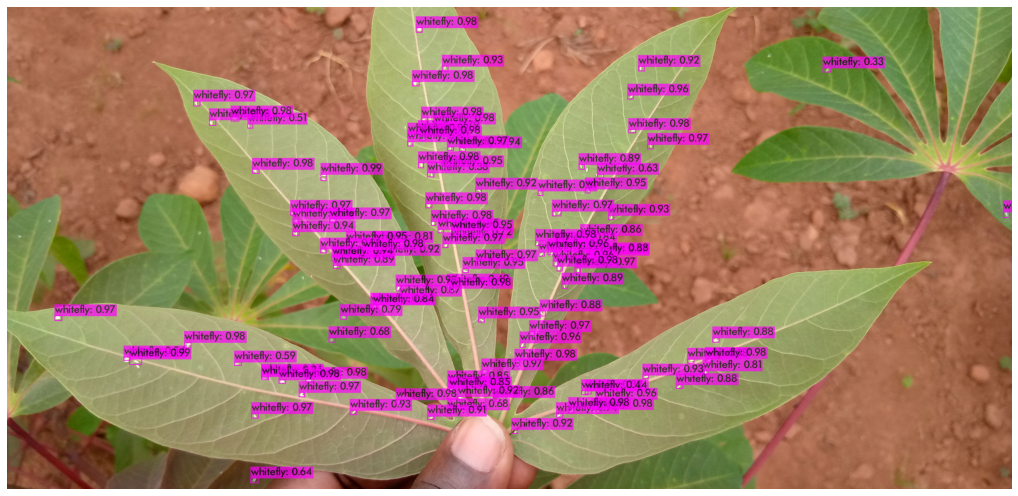

In [37]:
# Super abundance
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yolov4/training/yolov4-custom_best.weights /mydrive/imgs/IMG_20190311_230506_4.jpg -thresh 0.3 -dont_show
imShow('predictions.jpg')

Para retornar ao modo de treinamento, deve-se retornar os valores de batch e subdivisões para 64 e 16 respectivamente:

In [38]:
%cd cfg
!sed -i '3s/batch=1/# batch=1/1' yolov4-custom.cfg
!sed -i '4s/subdivisions=1/# subdivisions=1/1' yolov4-custom.cfg
!sed -i '6s/# batch=64/batch=64/1' yolov4-custom.cfg
!sed -i '7s/# subdivisions=16/subdivisions=16/1' yolov4-custom.cfg
%cd ..

/content/gdrive/MyDrive/yolov4/darknet/cfg
/content/gdrive/MyDrive/yolov4/darknet


# Referências:


*   https://github.com/AlexeyAB/darknet
*   https://medium.com/analytics-vidhya/train-a-custom-yolov4-object-detector-using-google-colab-61a659d4868
*   https://towardsdatascience.com/convert-pascal-voc-xml-to-yolo-for-object-detection-f969811ccba5
